In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os

In [35]:
# read data
X_train = pd.read_csv(os.path.join("Data", "X_train_NHkHMNU.csv"))
y_train = pd.read_csv(os.path.join("Data", "y_train_ZAN5mwg.csv"))
X_test = pd.read_csv(os.path.join("Data", "X_test_final.csv"))

In [36]:
X_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [51]:
X = X_train
y = y_train["TARGET"]

F = X.drop("ID", axis=1)
F = F.set_index(['DAY_ID', 'COUNTRY']).unstack(-1).fillna(method="ffill").fillna(0)
F = F.stack()
F = F.reindex(X.set_index(['DAY_ID', 'COUNTRY']).index)
F["ID"] = X.set_index(['DAY_ID', 'COUNTRY']).ID
F = F.reset_index()
F = F.drop(['ID', 'DAY_ID', 'COUNTRY'], axis = 1)
F = (F - F.mean(axis=0)) / F.std(axis=0)
F

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,-0.322749,-0.443339,-0.474413,0.474413,0.464311,0.705954,-0.464311,-0.705954,-0.399276,-0.671577,...,-0.324629,-0.145015,-0.534757,-0.853676,-0.397374,-1.122817,-0.080554,0.255896,0.060770,-0.075508
1,-0.668003,-1.070104,0.128688,-0.128688,-0.336409,-0.990247,0.336409,0.990247,-0.712695,0.035213,...,-1.148586,-1.218097,-0.731074,1.324316,0.639698,0.436268,1.795505,-0.653341,-0.014132,-0.519628
2,1.436853,2.174872,1.205333,-1.205333,-0.386898,-1.503423,0.386898,1.503423,1.848074,1.905375,...,2.343973,-0.454611,-0.311926,0.296880,0.321735,0.692373,0.095938,0.435291,0.659294,0.113270
3,-2.094953,-0.902253,-0.714909,0.714909,-0.021364,0.585387,0.021364,-0.585387,-0.344489,-0.221026,...,-0.918513,-1.091993,-0.490024,-0.579290,-0.353607,0.346767,-0.431190,0.777510,-0.346174,0.904255
4,-0.421190,-0.649629,-0.803037,0.803037,-0.775482,0.982623,0.775482,-0.982623,-0.637512,-0.701468,...,-0.415674,-0.515687,-0.413900,-1.133637,-1.076954,0.619364,0.704567,0.170330,1.416915,2.306400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1.636090,1.226028,-1.763045,1.763045,0.032986,1.410559,-0.032986,-1.410559,1.211453,1.095698,...,0.739912,0.307514,0.602709,0.895844,1.793460,-1.617642,-0.872857,0.745930,0.732981,1.128559
1490,1.768814,1.929141,0.782346,-0.782346,0.728149,-0.079976,-0.728149,0.079976,1.402133,1.283266,...,2.030448,-0.314386,-0.253659,-0.797630,-0.370272,-0.794028,-0.151640,0.796622,-0.142587,0.251082
1491,0.636992,0.554116,-0.112481,0.112481,-1.333671,-0.710040,1.333671,0.710040,1.562080,1.623144,...,0.571007,0.237517,0.346525,-0.668914,0.700900,0.248864,0.380598,-1.066732,-0.289750,-0.012159
1492,0.197870,-0.352282,-0.705264,0.705264,-0.056742,1.187155,0.056742,-1.187155,-0.922938,0.523688,...,-0.034779,-0.657760,-0.382499,-1.024349,-1.534459,1.241543,1.307804,0.824114,-5.275969,-0.841346


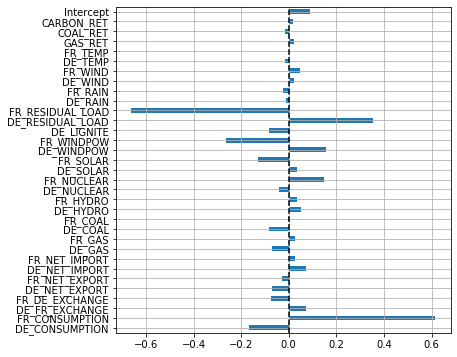

In [63]:
import sklearn.linear_model
lr = sklearn.linear_model.LinearRegression(fit_intercept = True)

lr.fit(F, y)

coeff = pd.Series(lr.coef_, index = F.columns, dtype = np.float64)
coeff["Intercept"] = lr.intercept_

fig, ax = plt.subplots(figsize= (6,6))
ax1 = ax
coeff.plot(kind = "barh", ax = ax1)
ax1.grid()
ax1.axvline(0, color = "black", linestyle = "--")

In [64]:
X = X_test

F = X.drop("ID", axis=1)
F = F.set_index(['DAY_ID', 'COUNTRY']).unstack(-1).fillna(method="ffill").fillna(0)
F = F.stack()
F = F.reindex(X.set_index(['DAY_ID', 'COUNTRY']).index)
F["ID"] = X.set_index(['DAY_ID', 'COUNTRY']).ID
F = F.reset_index()
F = F.drop(['ID', 'DAY_ID', 'COUNTRY'], axis = 1)
F = (F - F.mean(axis=0)) / F.std(axis=0)
F

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,-0.118635,-0.475015,-0.418796,0.418796,0.396439,0.625903,-0.396439,-0.625903,0.797542,-0.025970,...,-0.155115,-0.496739,-0.179198,-1.062486,-0.969957,0.931992,0.736930,0.468378,-0.128502,-0.903655
1,0.458743,0.757105,0.721288,-0.721288,0.583162,0.661701,-0.583162,-0.661701,0.274100,1.436400,...,0.978272,-0.348963,-0.295605,-0.838676,-1.325065,-0.571071,-0.653741,0.173230,0.656135,0.571878
2,0.449182,0.697776,1.363598,-1.363598,1.927938,0.772767,-1.927938,-0.772767,-0.789108,-0.519777,...,0.548349,0.624655,-0.360294,0.302701,-0.564945,0.916578,0.180401,-1.437993,-0.425745,-0.366994
3,-0.327492,-0.769160,0.002683,-0.002683,0.881996,-0.095750,-0.881996,0.095750,0.253619,-0.658095,...,-0.510545,-0.521935,-0.014180,-0.870131,-0.988162,0.288103,0.508560,-0.752668,2.167635,0.551489
4,0.641391,0.391558,0.738838,-0.738838,0.862779,-0.131180,-0.862779,0.131180,0.629206,1.020663,...,0.606683,-0.254515,-0.596887,-0.823775,-1.299152,0.225258,0.367619,-2.118871,-0.608869,-0.495341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,-0.208895,-0.949718,0.886060,-0.886060,1.483550,-1.499018,-1.483550,1.499018,-1.617671,-0.460845,...,-1.030822,1.305449,-0.279504,2.207958,1.629961,-0.793971,-0.387411,-1.054121,0.623075,-1.748979
650,1.189305,1.453475,0.788202,-0.788202,0.865331,-1.817230,-0.865331,1.817230,0.194297,1.600328,...,1.185599,0.075780,-0.165887,1.221574,2.197626,-0.282408,-1.076672,-1.256836,-0.997247,-0.900478
651,1.174898,1.773297,0.671682,-0.671682,-0.121249,-1.347872,0.121249,1.347872,2.717537,1.806200,...,1.992551,-0.764386,-0.262151,-1.328388,-0.753352,-0.762850,-1.162723,0.804328,0.052662,0.396168
652,0.993568,1.965524,0.649708,-0.649708,-0.944788,-1.349477,0.944788,1.349477,1.944110,1.854596,...,2.139241,-0.181690,-0.352092,0.121154,-0.173669,1.406287,-0.408301,0.863503,-0.251294,1.871347


In [72]:
y_test = X[["ID"]]
y_test["TARGET"] = lr.predict(F)
y_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,TARGET
0,1115,-0.003047
1,1202,0.163993
2,1194,-0.171069
3,1084,-0.077499
4,1135,0.037129


In [74]:
y_test.to_csv(os.path.join("Data", "FastSub.csv"), index=False)